In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean(Dataset):
    """
    mean(Dataset)
        Dataset: Dataset of m points with n Dimensions of witch we calculate the average
    Calculates an average value for each Dimension, resulting in an n-dimensional average Point
    
    mean(Dataset)
        Dataset: Datensatz von m Punkten mit n Dimensionen, von dem wir den Durchschnitt berechnen
    Berechnet den durchschnitswert für jede Dimension, liefert einen n-dimensionalen durchschnittlichen Punkt"""
    numRows=len(Dataset)
    numColumns=len(Dataset[1])
    means = np.zeros(numColumns)
    
    for row in range(numRows):
        for column in range(numColumns):
            means[column]+=Dataset[row][column]
    means=means/numRows
    return means

In [3]:
def standartDeviation(inputMean,Dataset):
    """
    standartDeviation(inputMean,Dataset)
        inputMean: the n Dimensional Mean of the Following Dataset
        Dataset: Dataset of witch we calculate the StandartDeviation from
    Calculates the Standart Deviation of the Dataset for each of its dimensions
    
    standartDeviation(inputMean,Dataset)
        inputMean: der n-Dimensionale Durchschnittspunkt des folgenden Datensatzes
        Dataset: Datensatz von dem wir die Standart deviation berechnen
    Berechnet die StandartDeviation vom Datensatz für alle seine Dimensionen
    """
    numColumns=len(Dataset[1])
    Deviation=np.zeros(numColumns)
    DeviationSquared = (Dataset.copy()-inputMean)**2 #per Point
    Deviation = mean(DeviationSquared)**0.5
    return Deviation

In [4]:
def Manhattan_D(X_training, validation_punkt):
    numReihen=len(X_training)
    entfehrnungen = np.zeros(numReihen)
    for PunktInX in range(numReihen):
            entfehrnungen[PunktInX] = sum(abs(PunktXTraining-PunktValidationX) for PunktXTraining,PunktValidationX in zip(X_training[PunktInX],validation_punkt))
    return entfehrnungen
                 
def Euclidean_D(X_training, validation_punkt):
    numReihen=len(X_training)
    
    entfehrnungen = np.zeros(numReihen)
    
    for PunktInX in range(numReihen):
            entfehrnungen[PunktInX] = np.sqrt(sum(np.square(PunktXTraining-PunktValidationX) for PunktXTraining,PunktValidationX in zip(X_training[PunktInX],validation_punkt)))
    return entfehrnungen

def Chebyshev_D(X_training, validation_punkt):
    numReihen=len(X_training)
    entfehrnungen = np.zeros(numReihen)
    for PunktInX in range(numReihen):
            entfehrnungen[PunktInX] = np.max(list(abs(PunktXTraining-PunktValidationX) for PunktXTraining,PunktValidationX in zip(X_training[PunktInX],validation_punkt)))
          
    return entfehrnungen

In [5]:
class KNN:
    def __init__(self,X,Y,k,d):
        """
        KNN(X,Y,k,d)
            X: Array of Pints with multiple dimensions, trainingsData
            Y: Classes of the Points in X, trianingsData
            k: number of nearest Neighbours to consider
            d: Distance function to be used to find the nearest Neighbours
        Also has the accessable, but internally used Values of:
            dataMean: mean of the trainings Data
            dataStandartDeviation: standart Deviation of the Trainingsdataset
            trained: bool weather or not the algorithm was trained
        calculates an enviroment and has the functions for:
        fit()
        predict(InputDaten)
        confusion(originalY, DataX)
        
        KNN(X,Y,k,d)
            X: Array mit punkten mit mehreren Dimensionen (Trainingsdaten)
            Y: Klassen der Punkte in X (Trainingsdaten)
            k: nummer der k nächsten nachbarn
            d: distanzfunktion um die k nächsten nachbarn zu bestimmen
        Auch aufrufbar, intern berechnet:
            dataMean: Mean der trainingsdaten
            dataStandartDeviation: StandartDeviation der Trainingsdaten
            trained: bool ob die Daten normalisiert werden
        berechnet eine Umgebung für den Algorithmus und folgende Funktionen:
            fit()
            predict(InputDaten)
            confusion(originalY, DataX)
        """
        self.X=X
        self.Y=Y
        self.dataMean=mean(self.X)
        self.dataStandartDeviation=standartDeviation(self.dataMean,self.X)
        self.trained=False
        self.k=k
        self.d=d
        
    def fit(self):
        """fit()
            normalises the data to create a reference inviroment for the nearest neighbors
            
            fit()
            normalisiert den Referenzdatensatz um eine Umgebung für die nächsten Nachbarn zu erschaffen"""
        if self.trained == False:
            self.X=(self.X-self.dataMean)/self.dataStandartDeviation
            self.trained=True
            
    def predict(self, InputDaten): 
        """
        predict(InputDaten)
            inputDaten: Data for witch to predict the Classes
        Predicts the class of each point in Input data, returns an array of predictions
        
        predict(InputDaten)
            inputDaten: Daten für die die Klassen vorhergesagt werden
        Sagt die klassen für jeden Punkt in den Inputdaten vorher, liefert ein array mit Vorhersagen"""
        InputDaten = (InputDaten-self.dataMean)/self.dataStandartDeviation
        numReihen = len(InputDaten)
        Prediction = np.zeros(numReihen)
        
        for InputPunkt in range(numReihen):
            EntfehrnungenAktuellerPunkt = self.d(self.X, InputDaten[InputPunkt])
            #list(EntfehrnungenAktuellerPunkt)
            DM_Array=EntfehrnungenAktuellerPunkt.reshape(len(EntfehrnungenAktuellerPunkt),1)
            x0= DM_Array
            KNNData_XNew=np.hstack((self.X,x0))
            n,m= KNNData_XNew.shape
            x1= self.Y
            #stack the sequence of input arrays 
            KNNData_XNew1=np.hstack((KNNData_XNew,x1))
            ListKNNData_XNew1=list(KNNData_XNew1)
            def takeDM(elem):
                return elem[-2]
            ListKNNData_XNew1.sort(key=takeDM, reverse=False)
            #print(ListKNNData_XNew1)
            l=[]
            for i in range(self.k):
                l.append(ListKNNData_XNew1[i][-1])
            if l.count(1)>l.count(0):
                Prediction[InputPunkt]=1
            else:
                Prediction[InputPunkt]=0
            
            
            #EntfehrnungenAktuellerPunkt = self.d(self.X, InputDaten[InputPunkt])
            #indexes = np.argpartition(EntfehrnungenAktuellerPunkt,self.k)
            #klassenKleinsterWerte = self.Y[indexes[:self.k]]
            #if np.count_nonzero(klassenKleinsterWerte == 1)>np.count_nonzero(klassenKleinsterWerte == 0):
            #    Prediction[InputPunkt]=1
            #else:
            #    Prediction[InputPunkt]=0
            
            #if np.count_nonzero(klassenKleinsterWerte == 1)>self.k//2:
            #    Prediction[InputPunkt]=1
            #else:
            #    Prediction[InputPunkt]=0
        return Prediction
    
    
    def confusion(self, originalY, DataX):
        """
        confusion(originalY, DataX)
            originalY: original Y Mesurements, for comparison
            DataX: Data that will be calculated and analysed
        calculates the confusion Matrix
        
        confusion(originalY, DataX)
            originalY: uhrsprünglich gemessene Werte für internen Vergleich
            DataX: Daten, von denen die Y Werte berechnet und mit dem originalen verglichen werden
        berechnet die confusion Matrix"""
        predictedY = self.predict(DataX)
        numEinträge = len(predictedY)
        confusion_M = np.zeros((2,2))
        for i in range(numEinträge):
            if (predictedY[i]==1 and originalY[i]==1):
                confusion_M[0,0]+=1
            elif (predictedY[i]==0 and originalY[i]==0):
                confusion_M[1,1]+=1
            elif (predictedY[i]==1 and originalY[i]==0):
                confusion_M[0,1]+=1
            else:
                confusion_M[1,0]+=1
                    
        return confusion_M

In [6]:
#loading Data
rawData = pd.read_csv(r'C:\Users\Linusyao\Downloads\KNNAlgorithmDataset (1).csv')
#y is diagnose; x ist mehrdimensional und der rest der Reihe also alle mean alle se und alles worst
Datay=np.array(rawData.loc[:,:'diagnosis'])
Datax=np.array(rawData.loc[:,'radius_mean':'fractal_dimension_worst'])

n,m=np.shape(Datax)

#200 Datax als Musterform rausschneiden
Percent70=round(n*0.7)
Percent20=round(n*0.2)
Percent10=round(n*0.1)

trainingDatax=Datax[:Percent70,:]
trainingDatay=Datay[:Percent70,:]
validationDatax=Datax[Percent70:Percent70+Percent20,:]
validationDatay=Datay[Percent70:Percent70+Percent20,:]
testDatax=Datax[Percent70+Percent20:,:]
testDatay=Datay[Percent70+Percent20:,:]

In [7]:
KNNData = KNN(trainingDatax,trainingDatay,5,Euclidean_D)


KNNData.fit()
print(KNNData.predict(validationDatax))
print(validationDatay)
print(KNNData.predict(testDatax))
print(testDatay)
print(KNNData.confusion(testDatay,testDatax))
print(KNNData.confusion(validationDatay,validationDatax))
print(KNNData.dataMean)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
[1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0

In [8]:
for k in range(5,15):
    KNNData = KNN(trainingDatax,trainingDatay,(k),Manhattan_D)
    

    KNNData.fit()
    print(k)
    confusion_M = KNNData.confusion(validationDatay,validationDatax)
    print(confusion_M)
    
    ACC= (confusion_M[0,0]+confusion_M[1,1])/(confusion_M[0,0]+confusion_M[1,1]+confusion_M[0,1]+confusion_M[1,0])            
    print(ACC)

5
[[24.  1.]
 [ 1. 88.]]
0.9824561403508771
6
[[24.  0.]
 [ 1. 89.]]
0.9912280701754386
7
[[25.  0.]
 [ 0. 89.]]
1.0
8
[[25.  0.]
 [ 0. 89.]]
1.0
9
[[25.  1.]
 [ 0. 88.]]
0.9912280701754386
10
[[25.  1.]
 [ 0. 88.]]
0.9912280701754386
11
[[25.  1.]
 [ 0. 88.]]
0.9912280701754386
12
[[23.  1.]
 [ 2. 88.]]
0.9736842105263158
13
[[24.  1.]
 [ 1. 88.]]
0.9824561403508771
14
[[24.  1.]
 [ 1. 88.]]
0.9824561403508771


In [9]:
for k in range(5,15):
    KNNData = KNN(trainingDatax,trainingDatay,(k),Euclidean_D)
    

    KNNData.fit()
    print(k)
    confusion_M = KNNData.confusion(validationDatay,validationDatax)
    print(confusion_M)
    
    ACC= (confusion_M[0,0]+confusion_M[1,1])/(confusion_M[0,0]+confusion_M[1,1]+confusion_M[0,1]+confusion_M[1,0])            
    print(ACC)

5
[[24.  2.]
 [ 1. 87.]]
0.9736842105263158
6
[[24.  1.]
 [ 1. 88.]]
0.9824561403508771
7
[[24.  2.]
 [ 1. 87.]]
0.9736842105263158
8
[[24.  0.]
 [ 1. 89.]]
0.9912280701754386
9
[[24.  0.]
 [ 1. 89.]]
0.9912280701754386
10
[[24.  0.]
 [ 1. 89.]]
0.9912280701754386
11
[[24.  2.]
 [ 1. 87.]]
0.9736842105263158
12
[[24.  0.]
 [ 1. 89.]]
0.9912280701754386
13
[[24.  2.]
 [ 1. 87.]]
0.9736842105263158
14
[[24.  1.]
 [ 1. 88.]]
0.9824561403508771


In [10]:
for k in range(0,15):
    KNNData = KNN(trainingDatax,trainingDatay,(k),Chebyshev_D)
    

    KNNData.fit()
    print(k)
    confusion_M = KNNData.confusion(validationDatay,validationDatax)
    print(confusion_M)
    
    ACC= (confusion_M[0,0]+confusion_M[1,1])/(confusion_M[0,0]+confusion_M[1,1]+confusion_M[0,1]+confusion_M[1,0])            
    print(ACC)

0
[[ 0.  0.]
 [25. 89.]]
0.7807017543859649
1
[[24. 10.]
 [ 1. 79.]]
0.9035087719298246
2
[[23.  1.]
 [ 2. 88.]]
0.9736842105263158
3
[[24.  4.]
 [ 1. 85.]]
0.956140350877193
4
[[23.  1.]
 [ 2. 88.]]
0.9736842105263158
5
[[23.  3.]
 [ 2. 86.]]
0.956140350877193
6
[[23.  2.]
 [ 2. 87.]]
0.9649122807017544
7
[[23.  4.]
 [ 2. 85.]]
0.9473684210526315
8
[[23.  2.]
 [ 2. 87.]]
0.9649122807017544
9
[[24.  4.]
 [ 1. 85.]]
0.956140350877193
10
[[24.  3.]
 [ 1. 86.]]
0.9649122807017544
11
[[24.  4.]
 [ 1. 85.]]
0.956140350877193
12
[[24.  2.]
 [ 1. 87.]]
0.9736842105263158
13
[[24.  3.]
 [ 1. 86.]]
0.9649122807017544
14
[[24.  2.]
 [ 1. 87.]]
0.9736842105263158


In [11]:
#best k=8, d=manhattan auf testdaten angewendet
KNNData = KNN(trainingDatax,trainingDatay,(8),Manhattan_D)
    

KNNData.fit()
confusion_M = KNNData.confusion(testDatay,testDatax)
print(confusion_M)
    
ACC= (confusion_M[0,0]+confusion_M[1,1])/(confusion_M[0,0]+confusion_M[1,1]+confusion_M[0,1]+confusion_M[1,0])            
print(ACC)

[[12.  0.]
 [ 2. 43.]]
0.9649122807017544


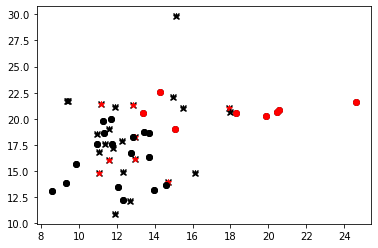

In [12]:
N = 25

t_points_1_x=[]
t_points_2_x=[]

t_points_1_y=[]
t_points_2_y=[]

v_points_1_x=[]
v_points_2_x=[]

v_points_1_y=[]
v_points_2_y=[]


x_t = testDatax[:N,0]
y_t = testDatax[:N,1]
plt.scatter(x_t, y_t,  c='k', marker='o')

x_v = validationDatax[:N,0]
y_v = validationDatax[:N,1]
plt.scatter(x_v, y_v,  c='k', marker='x')

for point in range(len(x_t)):
    if testDatay[point]==1:
        t_points_1_x.append(x_t[point])
        t_points_1_y.append(y_t[point])
    else:
        t_points_2_x.append(x_t[point])
        t_points_2_y.append(y_t[point])
        
for point in range(len(x_v)):
    if testDatay[point]==1:
        v_points_1_x.append(x_v[point])
        v_points_1_y.append(y_v[point])
    else:
        v_points_2_x.append(x_v[point])
        v_points_2_y.append(y_v[point])
        
plt.scatter(v_points_1_x, v_points_1_y,  c='red', marker='*')
plt.scatter(v_points_2_x, v_points_2_y,  c='k', marker='*')
plt.scatter(t_points_1_x, t_points_1_y,  c='red', marker='o')
plt.scatter(t_points_2_x, t_points_2_y,  c='k', marker='o')
plt.show()
